In [1]:
import os
import ast
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

%reload_ext autoreload
%autoreload 2

In [2]:
path_3 = r"/home/docker/car_racing/models/DQN_1" # LR = 0.00001
path_4 = r"/home/docker/car_racing/models/DQN_2" # LR = 0.0001
path_5 = r"/home/docker/car_racing/models/DQN_3" # LR = 0.001
path_6 = r"/home/docker/car_racing/models/DQN_4" # LR = 0.01

In [3]:
file_lr00001 = os.path.join(path_3, 'mprofile_20240329190832.dat')
file_lr0001 = os.path.join(path_4, "mprofile_20240330060910.dat")
file_lr001 = os.path.join(path_5, "mprofile_20240330095133.dat")
file_lr01 = os.path.join(path_6, "mprofile_20240330144433.dat")

In [4]:
df_00001 = pd.read_csv(file_lr00001, sep=' ', header=0)
df_0001 = pd.read_csv(file_lr0001, sep=' ', header=0)
df_001 = pd.read_csv(file_lr001, sep=' ', header=0)
df_01 = pd.read_csv(file_lr01, sep=' ', header=0)

In [5]:
df_list = [df_00001, df_0001, df_001, df_01]
for frame in df_list:
    frame.drop(frame.columns[0], axis=1, inplace=True)
    frame.columns = ['memory', 'time']
    frame['time'] = frame['time'] - frame['time'][0]
    frame['memory'] = frame['memory'] / 1000

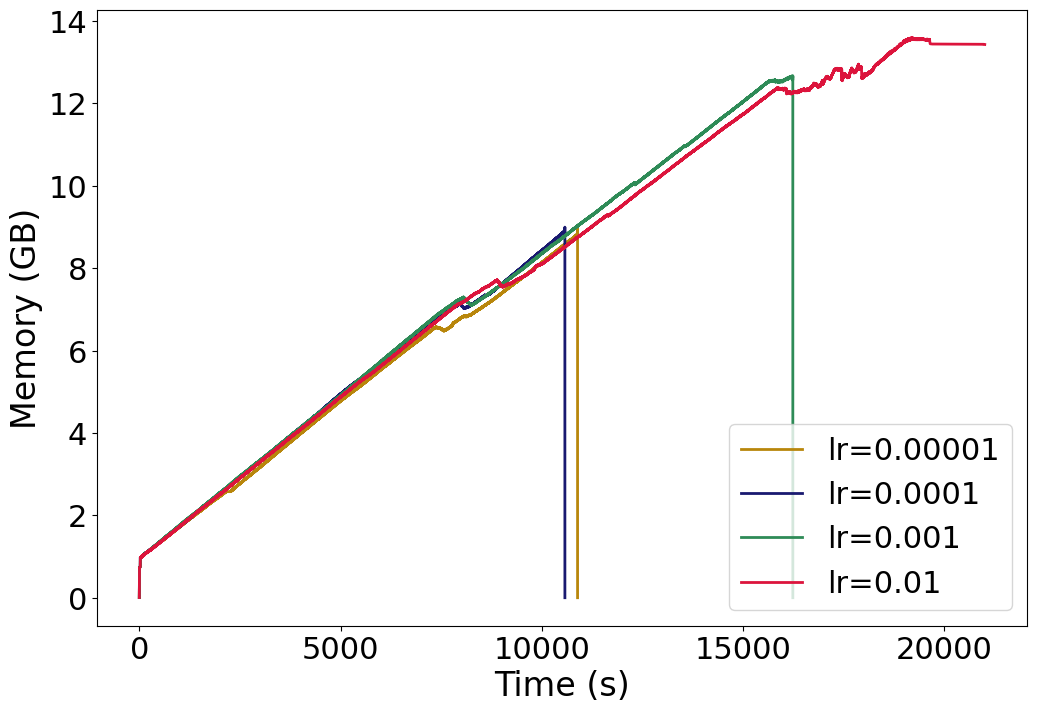

In [29]:
colors = ['darkgoldenrod', 'midnightblue', 'seagreen', 'crimson']
labels = ['lr=0.00001', 'lr=0.0001', 'lr=0.001', 'lr=0.01']

plt.figure(figsize=(12, 8))
for i, frame in enumerate(df_list):
    plt.plot(frame['time'], frame['memory'], color=colors[i], label=labels[i], linewidth=2)

plt.xlabel('Time (s)', fontsize=24)
plt.ylabel('Memory (GB)', fontsize=24)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.legend(fontsize=22, loc='lower right')
plt.show()

In [28]:
max_values = [frame['memory'].max() for frame in df_list]
max_time = [round(frame['time'].max(), 0) for frame in df_list]
learning_rates = [0.00001, 0.0001, 0.001, 0.01]

In [29]:
df = pd.DataFrame({'learning_rate': learning_rates, 'max_memory': max_values, 'max_time': max_time})

/tmp/ipykernel_7743/2045992179.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='learning_rate', y='max_memory', palette='viridis')


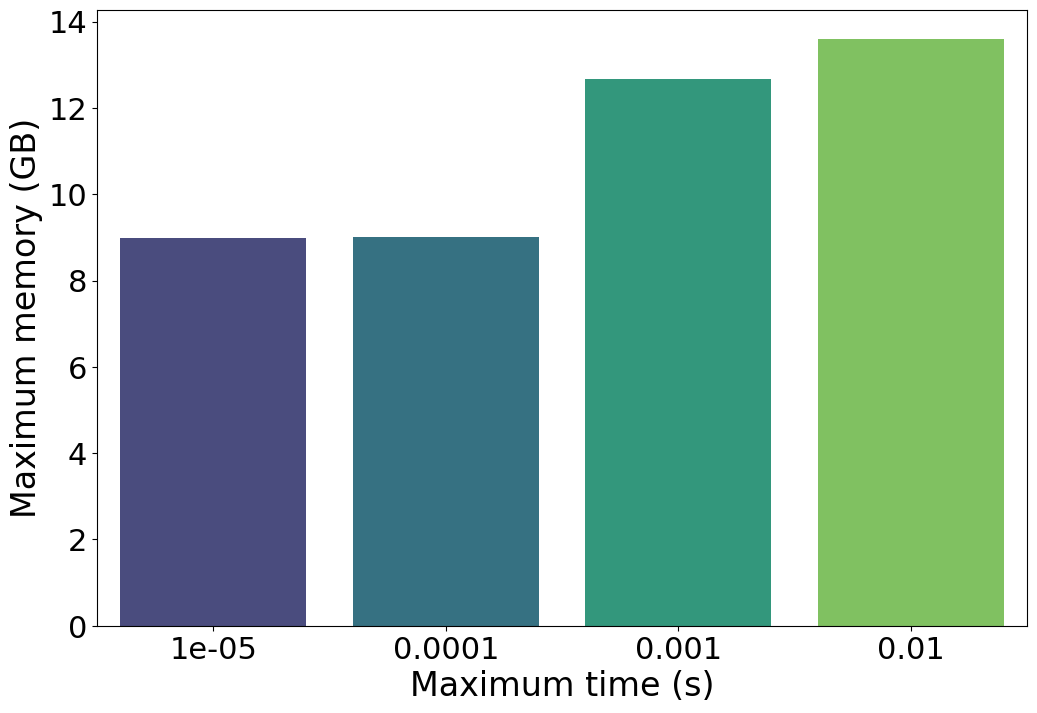

In [36]:
plt.figure(figsize=(12, 8))
# sns.scatterplot(data=df, x='max_time', y='max_memory', 
#                 hue='max_time', size='learning_rate',
#                 sizes=(50, 1000), palette='viridis')
sns.barplot(data=df, x='learning_rate', y='max_memory', palette='viridis')

# Set labels and title
plt.ylabel('Maximum memory (GB)', fontsize=24)
plt.xlabel('Learning rate', fontsize=24)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
# plt.legend(fontsize=20, loc='upper left')

# Show the plot
plt.show()

# Carbon Emissions

In [14]:
carbon_emissions = [0.32, 0.32, 0.49, 0.63]


In [33]:
df = pd.DataFrame({'learning_rate': learning_rates, 'max_memory': max_values, 'max_time': max_time, 'carbon_emissions': carbon_emissions})

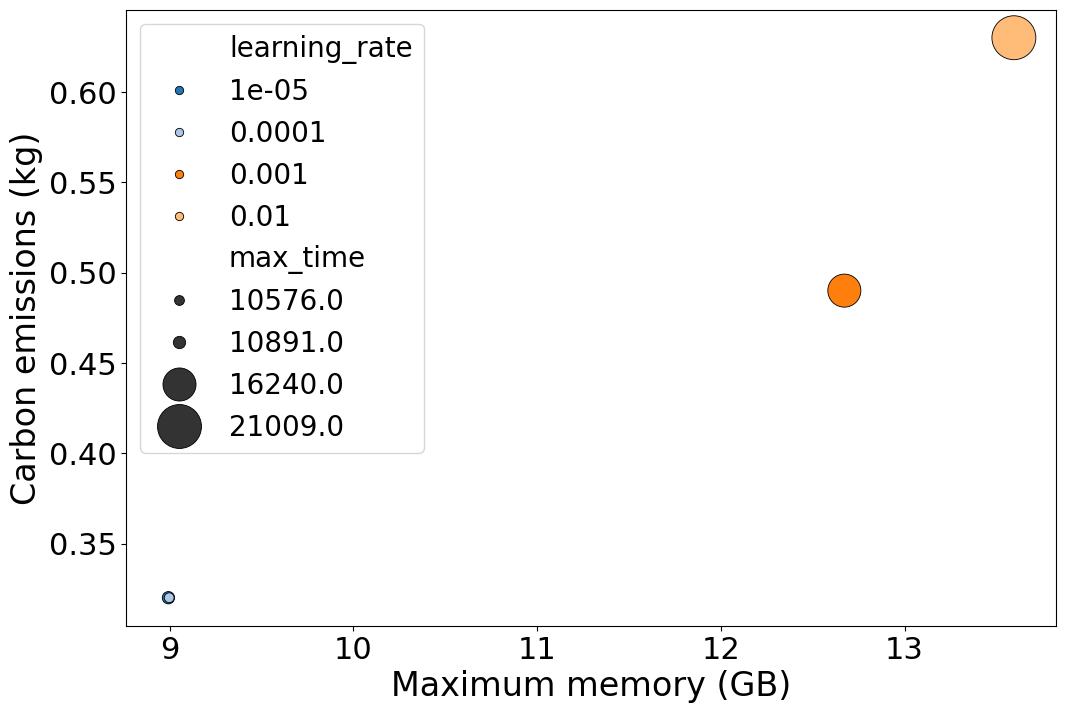

In [46]:
plt.figure(figsize=(12, 8))
# sns.barplot(data=df, x='learning_rate', y='carbon_emissions', palette='viridis')
sns.scatterplot(data=df, x='max_memory', y='carbon_emissions', 
                hue='learning_rate', size='max_time',
                sizes=(50, 1000), palette='tab20', edgecolor='black')

plt.xlabel('Maximum memory (GB)', fontsize=24)
plt.ylabel('Carbon emissions (kg)', fontsize=24)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.legend(fontsize=20, loc='upper left')
plt.show()